In [1]:
from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC,LinearSVC
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import os
import pickle
import pandas as pd
from sklearn.utils import resample

pd.options.display.max_rows = 35 
pd.options.display.max_columns = None

In [2]:
def get_pickles(split_type): 
    x_train = pickle.load(open(f'../Pickles/{split_type}_x_train.p', 'rb'))
    x_test = pickle.load(open(f'../Pickles/{split_type}_x_test.p', 'rb'))
    y_train = pickle.load(open(f'../Pickles/{split_type}_y_train.p', 'rb'))
    y_test = pickle.load(open(f'../Pickles/{split_type}_y_test.p', 'rb'))
    
    
    print('Train Value Counts')
    print(y_train.value_counts())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('Test Value Counts')
    print(y_test.value_counts())
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
    return x_train, x_test, y_train, y_test


x_train, x_test, y_train, y_test = get_pickles(2)
print(x_train.shape, x_test.shape) 
print(y_train.shape, y_test.shape)

Train Value Counts
1.0    510
0.0    484
Name: Emotion_New, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~
Test Value Counts
1.0    90
0.0    86
Name: Emotion_New, dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~
(994, 5000) (176, 5000)
(994,) (176,)


### Resampling
- 0 = negative
- 1 = Positive 
- 2 = neutral

In [6]:
models = {'Log': LogisticRegression(), 'Knn': KNeighborsClassifier(), 
          'DT': DecisionTreeClassifier(random_state = 10), 'Gaussian': GaussianNB(), 'LDA': LinearDiscriminantAnalysis(),
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'ADA': AdaBoostClassifier(random_state = 10), 'Bagging': BaggingClassifier(random_state = 10), 
          'Ridge': RidgeClassifier(random_state = 10), 
          'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
stack_m = [] 
for model, m in models.items(): 
    stack_m.append((model, m))
stack_model = StackingClassifier(estimators = stack_m, final_estimator = LogisticRegression(), cv = 5)
models['stacked'] = stack_model

#test each model and stacking
results = []
model_names = []
pbar = tqdm(models.items())
for model, m in pbar: 
    pbar.set_description(f'Evaluating {model.upper()}')
    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5)
    scores = cross_val_score(m, x_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = 13, 
                             error_score = 'raise')
    results.append(scores)
    model_names.append(model)

Evaluating STACKED: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [09:42<00:00, 48.54s/it]


In [7]:
vanilla_dict = {i:y for i,y in zip(model_names, results)}
pickle.dump(vanilla_dict, open('models/VanillaResults.p', 'wb'))

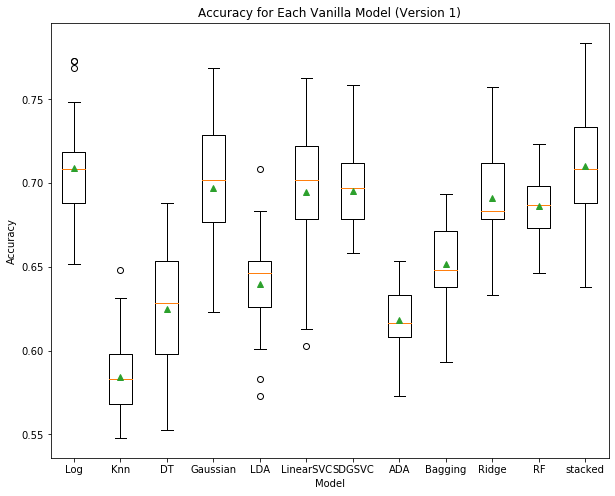

In [8]:
plt.figure(figsize = (10,8))
plt.boxplot(results, labels = model_names, showmeans = True)
plt.title('Accuracy for Each Vanilla Model (Version 1)')
plt.ylabel('Accuracy'); plt.xlabel('Model')
plt.savefig('figures/BaselineAccuracy.png')
plt.show()

In [11]:
models = {'Log': LogisticRegression(), 
          'Gaussian': GaussianNB(), 
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'SDGSVC': SGDClassifier(random_state = 10),  
          'Ridge': RidgeClassifier(random_state = 10), 'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
stack_m = [] 
for model, m in models.items(): 
    stack_m.append((model, m))
stack_model = StackingClassifier(estimators = stack_m, final_estimator = LogisticRegression(), cv = 5)
models['stacked'] = stack_model

#test each model and stacking
results = []
model_names = []
pbar = tqdm(models.items())
for model, m in pbar: 
    pbar.set_description(f'Evaluating {model.upper()}')
    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 5)
    scores = cross_val_score(m, x_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1, 
                             error_score = 'raise')
    results.append(scores)
    model_names.append(model)

Evaluating STACKED: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:51<00:00, 15.97s/it]


In [12]:
vanilla_dict = {i:y for i,y in zip(model_names, results)}
pickle.dump(vanilla_dict, open('models/VanillaResults2.p', 'wb'))

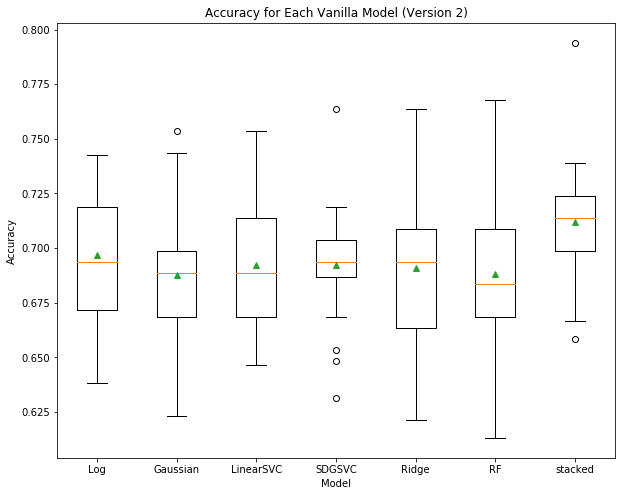

In [13]:
plt.figure(figsize = (10,8))
plt.boxplot(results, labels = model_names, showmeans = True)
plt.title('Accuracy for Each Vanilla Model (Version 2)')
plt.ylabel('Accuracy'); plt.xlabel('Model')
plt.savefig('figures/BaselineAccuracy2.png')
plt.show()

In [14]:
models = {'Log': LogisticRegression(), 
          'Gaussian': GaussianNB(), 
          'LinearSVC': LinearSVC(max_iter = 1250, random_state = 10), 'Ridge': RidgeClassifier(random_state = 10), 
          'RF': RandomForestClassifier(random_state = 10)}

#create stacked model
stack_m = [] 
for model, m in models.items(): 
    stack_m.append((model, m))
stack_model = StackingClassifier(estimators = stack_m, final_estimator = LogisticRegression(), cv = 5)
models['stacked'] = stack_model

#test each model and stacking
results = []
model_names = []
pbar = tqdm(models.items())
for model, m in pbar: 
    pbar.set_description(f'Evaluating {model.upper()}')
    cv = RepeatedStratifiedKFold(n_splits = 7, n_repeats = 10)
    scores = cross_val_score(m, x_train, y_train, scoring = 'accuracy', cv = cv, n_jobs = -1, 
                             error_score = 'raise')
    results.append(scores)
    model_names.append(model)

Evaluating STACKED: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [05:37<00:00, 56.28s/it]


In [15]:
vanilla_dict = {i:y for i,y in zip(model_names, results)}
pickle.dump(vanilla_dict, open('models/VanillaResults3.p', 'wb'))

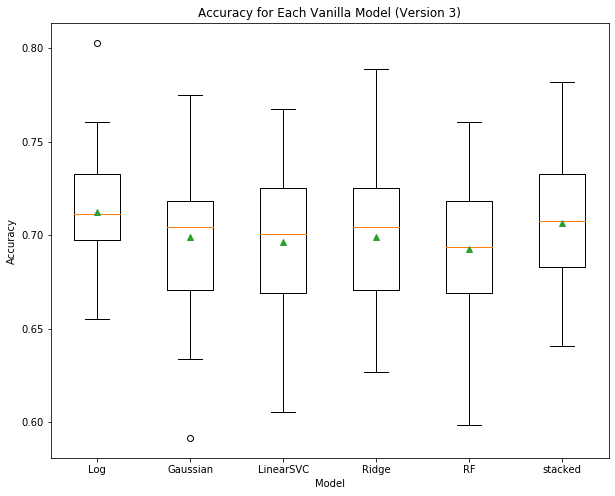

In [16]:
plt.figure(figsize = (10,8))
plt.boxplot(results, labels = model_names, showmeans = True)
plt.title('Accuracy for Each Vanilla Model (Version 3)')
plt.ylabel('Accuracy'); plt.xlabel('Model')
plt.savefig('figures/BaselineAccuracy2.png')
plt.show()